# CompBayes: Report02

## Uma Desai

MIT License: https://opensource.org/licenses/MIT

In [24]:
from __future__ import print_function, division

import numpy as np

import thinkbayes2
from thinkbayes2 import Pmf, Cdf, Suite, Beta
import thinkplot

% matplotlib inline

## #1. Originial Bayes' Problem: Type 1

Measles, mumps, and rubella (MMR) are very serious diseases that were common, especially among young children, before the introduction of MMR vaccines. Now most children are instructed to get 2 doses of MMR vaccine. The firsts dose is delivered when they are 12 to 15 months old, and the second does is delivered when they are 4 to 6 years old. According to the CDC, one dose of the MMR vaccine has about a 93% success rate for preventing measles if exposed to the virus, ad the two doses are about 97% successful. In a class of kindergartners, all between the ages of 5 and 7, at Sierra Oaks Elementary School, 85% of the students have already received both doses of the vaccine, while 15% of the students still need to receive their second dose. One student gets MMR, but the information about his vaccinations has been lost. What is the probability that he had already taken both doses of the vaccine and still got sick?

For this problem we can define the set of hypotheses as:

A. He had only taken one dose of the MMR vaccine.

B. He had taken both doses of the MMR vaccine.

The priors for each of these cases represent the probability that he had one or two doses, regardless of the fact that he got sick.

H(A) = 0.15

H(B) = 0.85

The likelihoods for each case are determined by the success rate of each of the doses.

Likelihood(A) = 0.07

Likelihood(B) = 0.03

We can use Bayes' Theorem to determine the posteriors for each case.

Unnormalized Posterior(A) = H(A) * Likelihood (A) = (0.15) * (0.07) = 0.0105

Unnormalized Posterior(B) = H(B) * Likelihood (B) = (0.85) * (0.03) = 0.0255

Normalized Posterior(A) = 0.0105 / (0.0105 * 0.0255) = 0.291666667

Normalized Posterior(B) = 0.0255 / (0.0105 * 0.0255) = 0.708333333

So, the probability that he had already taken both doses of the vaccine and still got sick is 0.708!

## #1. Originial Bayes' Problem: Type 2
## Part 1

Twins Dan and Liz are excited to be turning 11 years old, and their parents decide to get them each an orange tabby cat for their birthdays! Liz loves her new cats, Toby and Cara, but what she really wants is a female kitten. How many kittens do Toby and Cara have to produce in order for there to be an almost 100% chance that Liz gets a female kitten?

To solve this problem, we first have to make a few assumptions. Since cats give birth to varying numbers of kittens at a time, we'll count each new kitten as a separate event. For each event, we'll assume that the probability that the kitten is female is 0.5. 

We want: P(k >= 1) > .99 where k represents the number of female kittens.

The probability that at least one kitten is female is equal to 1 minus the probability that n kittens are male. 

P(k >= 1) = 1 - P(k < 1) = 1 - P(k = 0) 

1 - (n choose 0) * (1/2)^0 * (1/2)^n > 0.99

(1/2)^n < 0.01

n > 6.64

So Toby and Cara must produce 7 kittens in order for there to be more than an 99% chance that Liz gets at least one female kitten.

## Part 2

Now, what if Cara gives birth to 25 cats, and only 4 of the 25 cats were female? Do these results provide us with evidence that the assumption we made about the 50% chance of each kitten being female was off? 

To answer this question, we can estimate the probability x that Cara gives birth to a female kitten using Bayes' theorem and the observed data. If the odds of Cara giving birth to a male or female kitten are even, than we expect x to be close to 50%, but if females are more or less likely to be born, x may be very different. 

We can use a binomial likelihood function to solve for the chance of Cara giving birth to a female instead of a male. If the probability of heads is p, we can compute the probability of k=4 females in n=25 births using the binomial PMF.

In [25]:
class Kitten(Suite):
    """Compute the likelihood of 'data' given 'hypo'.
    
    data: tuple of (female births, male births)
    hypo: probability of heads, 0-100
    
    returns: float
    """
    def Likelihood(self, data, hypo):
        x = hypo / 100.0
        female, male = data
        like = x**female * (1-x)**male
        return like
    
suite = Kitten(xrange(0,101))
dataset = 4, 21
suite.Update(dataset)

3.0103345602249743e-06

18.51851788666986

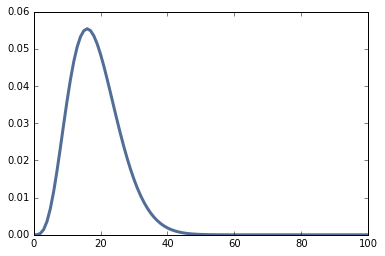

In [26]:
thinkplot.Pdf(suite)
suite.Mean()

In [27]:
suite.CredibleInterval(90)

(8, 32)

Turns out that only about 20% of orange tabby cats are female. The gene for the orange color is a recessive trait that is located on the X chromosome . While males only have to inherit one orange gene to appear orange, females have to inherit two. Liz better take good care of her new female kittens, because it looks like it's going to be a while before Cara produces another!

## The Chess Problem

This question is from a quiz by Allen Downey.

Two identical twins are members of my chess club, but they never show up on the same day; in fact, they strictly alternate the days they show up. I can't tell them apart except that one is a better player than the other: Avery beats me 60% of the time and I beat Blake 70% of the time. If I play one twin on Monday and win, and the other twin on Tuesday and lose, which twin did I play on which day?

Our prior is that each case has an equal probability of occuring. Using the information given, I can multiply each prior by the corresponding likeliood to get my posteriors.

In [28]:
# 'AB' represents hypothesis 1 that you play Avery first and Blake second
# 'BA' represents hypothesis 2 that you play Blake first and Avery second 
Chess = Pmf(['AB', 'BA'])
Chess.Mult('AB', 0.4*0.3)
Chess.Mult('BA', 0.6*0.7)
Chess.Normalize()
Chess.Print()

AB 0.222222222222
BA 0.777777777778


The results from this model indicate that there is a 77.8% chance that you played Blake before you played Avery.

## Kim Rhode Problem

This problem is from a workbook by Allen Downey.

At the 2016 Summer Olympics in the Women's Skeet event, Kim Rhode faced Wei Meng in the bronze medal match.  They each hit 15 of 25 skeets, sending the match into sudden death.  In the first round, both hit 1 of 2 skeets.  In the next two rounds, they each hit 2 skeets.  Finally, in the fourth round, Rhode hit 2 and Wei hit 1, so Rhode won the bronze medal, making her the first Summer Olympian to win an individual medal at six consecutive summer games.

But after all that shooting, what is the probability that Rhode is actually a better shooter than Wei?  If the same match were held again, what is the probability that Rhode would win?

As always, you will have to make some modeling decisions, but one approach is to estimate, for each shooter, the probability of hitting a skeet.  Then, to estimate the probability that Rhode is a better shooter, you can draw samples from the two posterior distributions and compare them.  To estimate the probability of winning a rematch, you could draw samples from the posterior distributions and simulate a round of 25 shots.

First, I looked for data that I could use to easily compare Rhode and her opponent Meng using a beta function. I found data showing the mean number of clays hit and missed from past Olympic competitions and inputed these values into the beta function.

In [29]:
Rhode = Beta(42, 8, label = "Rhode")
Meng = Beta(42,8, label = "Meng")

Next, I updated the data with the new results.

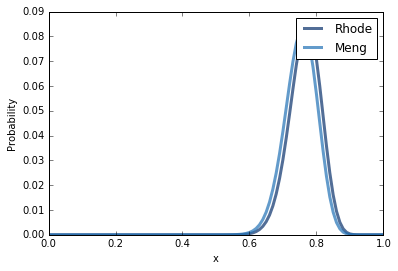

In [30]:
Rhode.Update((15+1+2+2, 10+1))
Meng.Update((15+1+2+1, 10+1+1))
thinkplot.Pdf(Rhode.MakePmf())
thinkplot.Pdf(Meng.MakePmf())
thinkplot.Config(ylabel = 'Probability', xlabel = 'x')

Finally, tusing a cumulative distribution of the betas for Rhode and Meng, we can determine an approximate probability that Rhode is actually a better shooter than Meng.

In [42]:
rhode_sample = Rhode.MakeCdf(2000).Sample(2000)
meng_sample = Meng.MakeCdf(2000).Sample(2000)
np.mean(rhode_sample > meng_sample)

0.54600000000000004

In [43]:
np.mean(rhode_sample < meng_sample)

0.45000000000000001

The results produced by this model indicate that the probability that Rhode is a better shooter than Meng is 54.6%!

Now, I want to figure out what would happen if there was ever an epic rematch between Rhode and Meng. Would Rhode win?

In [44]:
rematch_rhode = np.random.binomial(25, rhode_sample)
rematch_meng = np.random.binomial(25, meng_sample)
np.mean(rematch_rhode > rematch_meng)

0.44850000000000001

According to this model, there is a 44.85% chance that Rhode would win.

## Wedding Problem

This question was found at:
http://stattrek.com/probability/bayes-theorem.aspx

Marie is getting married tomorrow, at an outdoor ceremony in the desert. In recent years, it has rained only 5 days each year. Unfortunately, the weatherman has predicted rain for tomorrow. When it actually rains, the weatherman correctly forecasts rain 90% of the time. When it doesn't rain, he incorrectly forecasts rain 10% of the time. What is the probability that it will rain on the day of Marie's wedding?

The two possible hypotheses are:
A. It will rain on Marie's wedding day.
B. It won't rain on Marie's wedding day.

The priors are:
Prior(A) = 5/365
Prior (B) = 360/365

The Likelihoods are:
Likelihood(A) = .90
Likelihood(B) = .10

So, plugging in all of these terms into Bayes' theorem yields the following result for the posteriod of hyporthesis A:
Posterior(A) = 0.11

Thus, there is only a 11% chance that it will rain on Marie's wedding day despite the fact that the weatherman predicted rain.

## Euro Problem

This problem is from a workbook by Allen Downey.

Suppose you believe that most coins are fair or unlikely to deviate from 50% by more than a few percentage points. Construct a prior that captures this belief and update it with the Euro data. How much effect does it have on the posterior, compared to the uniform prior?

In [34]:
from scipy import special

class Beta:
    """Represents a Beta distribution.

    See http://en.wikipedia.org/wiki/Beta_distribution
    """
    def __init__(self, alpha=1, beta=1, label=None):
        """Initializes a Beta distribution."""
        self.alpha = alpha
        self.beta = beta
        self.label = label if label is not None else '_nolegend_'

    def Update(self, data):
        """Updates a Beta distribution.

        data: pair of int (heads, tails)
        """
        heads, tails = data
        self.alpha += heads
        self.beta += tails

    def Mean(self):
        """Computes the mean of this distribution."""
        return self.alpha / (self.alpha + self.beta)

    def MAP(self):
        """Computes the value with maximum a posteori probability."""
        a = self.alpha - 1
        b = self.beta - 1
        return a / (a + b)

    def Random(self):
        """Generates a random variate from this distribution."""
        return random.betavariate(self.alpha, self.beta)

    def Sample(self, n):
        """Generates a random sample from this distribution.

        n: int sample size
        """
        size = n,
        return np.random.beta(self.alpha, self.beta, size)

    def EvalPdf(self, x):
        """Evaluates the PDF at x."""
        return x ** (self.alpha - 1) * (1 - x) ** (self.beta - 1)

    def MakePmf(self, steps=101, label=None):
        """Returns a Pmf of this distribution.

        Note: Normally, we just evaluate the PDF at a sequence
        of points and treat the probability density as a probability
        mass.

        But if alpha or beta is less than one, we have to be
        more careful because the PDF goes to infinity at x=0
        and x=1.  In that case we evaluate the CDF and compute
        differences.

        The result is a little funny, because the values at 0 and 1
        are not symmetric.  Nevertheless, it is a reasonable discrete
        model of the continuous distribution, and behaves well as
        the number of values increases.
        """
        if label is None and self.label is not None:
            label = self.label

        if self.alpha < 1 or self.beta < 1:
            cdf = self.MakeCdf()
            pmf = cdf.MakePmf()
            return pmf

        xs = [i / (steps - 1) for i in range(steps)]
        probs = [self.EvalPdf(x) for x in xs]
        pmf = Pmf(dict(zip(xs, probs)), label=label)
        return pmf

    def MakeCdf(self, steps=101):
        """Returns the CDF of this distribution."""
        xs = [i / (steps - 1) for i in range(steps)]
        ps = special.betainc(self.alpha, self.beta, xs)
        cdf = Cdf(xs, ps)
        return cdf

    def Percentile(self, ps):
        """Returns the given percentiles from this distribution.

        ps: scalar, array, or list of [0-100]
        """
        ps = np.asarray(ps) / 100
        xs = special.betaincinv(self.alpha, self.beta, ps)
        return xs

We'll first implement this with the uniform prior and up date it with 140 heads and 110 tails. A Beta distribution with parameters `(1, 1)` is uniform from 0 to 1.

0.5595238095238095

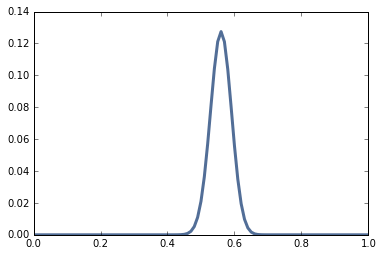

In [40]:
beta = Beta()
beta.Update((140, 110))
thinkplot.Pdf(beta.MakePmf())
beta.Mean()

In [41]:
beta.Percentile(50)

0.55968152742686994

Centering the beta values around 0.5 gives us a slightly different result.

0.5576923076923077

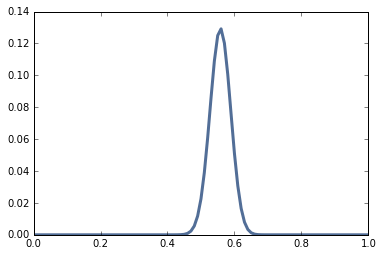

In [149]:
beta = Beta(5, 5)
beta.Update((140, 110))
thinkplot.Pdf(beta.MakePmf())
beta.Mean()

In [39]:
beta.Percentile(50)

0.55968152742686994

There is a noticeable effect on the posterior. Adding the belief that the coin is likely around 50% results in a lower mean value. The distribution curve appears to be just slightly closer to the center point of the x axis.